In [2]:
#rf:https://towardsdatascience.com/predict-where-a-new-user-will-book-their-first-travel-experience-e6c9ada67cf4

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


In [4]:
import os


In [5]:
os.getcwd()

'/Users/sulbha/Documents/git_repo/Machine Learning/Air bnb Prediction'

In [6]:
os.listdir()

['.DS_Store',
 'countries.csv',
 'age_gender_bkts.csv',
 'sample_submission_NDF.csv',
 'train_users_2.csv',
 'Air bnb Prediction.ipynb',
 '.ipynb_checkpoints',
 'test_users.csv',
 'sessions.csv']

In [7]:
train_file = pd.read_csv("train_users_2.csv")
test_file = pd.read_csv("test_users.csv")



In [8]:
print (train_file.shape)

(213451, 16)


In [9]:
print (test_file.shape)

(62096, 15)


In [10]:
df = pd.concat((train_file, test_file),join_axes=None, ignore_index=True)

In [11]:
df.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [12]:
df.gender.replace('-unknown-', np.nan, inplace=True)
df.first_browser.replace('-unknown-', np.nan, inplace=True)
df.drop('date_first_booking', axis=1, inplace=True)
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
first_affiliate_tracked      6085
first_browser               44394
first_device_type               0
gender                     129480
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [13]:
df.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [14]:
df.loc[df['age']<18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [15]:
df.loc[df['age']<80]['age'].describe()

count    155440.000000
mean         35.854786
std          11.254991
min           1.000000
25%          28.000000
50%          33.000000
75%          41.000000
max          79.000000
Name: age, dtype: float64

In [16]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 16, 'age'] = np.nan
df['age'].describe()

count    155887.000000
mean         36.033370
std          11.589997
min          16.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

/Users/sulbha/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


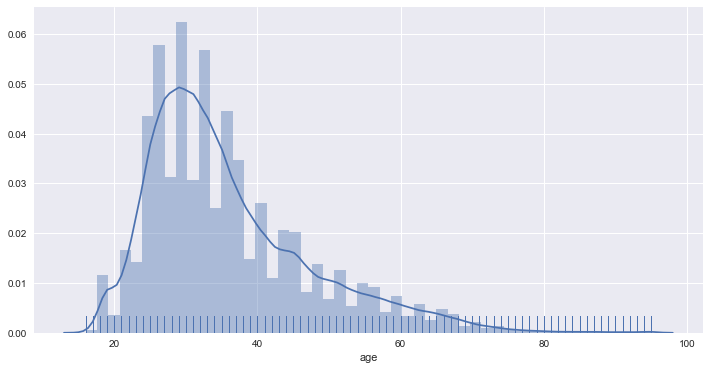

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(df.age.dropna(), rug=True)
sns.despine()

/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


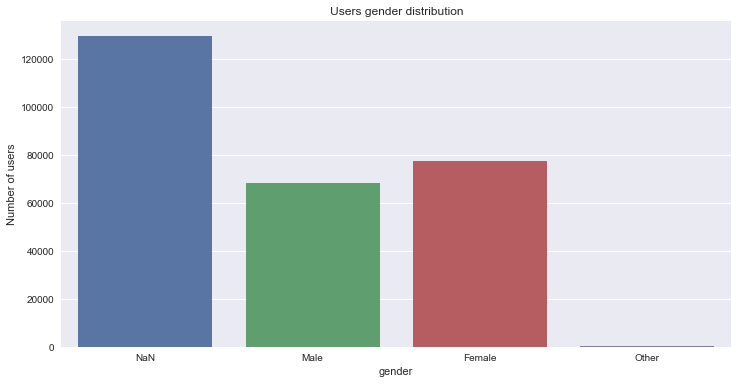

In [18]:
plt.figure(figsize=(12,6))
df["gender"] = df['gender'].fillna('M')
sns.countplot(data=df, x='gender')
plt.xticks(np.arange(4), ("NaN", "Male", "Female", "Other"))
plt.ylabel('Number of users')
plt.title('Users gender distribution')
sns.despine()